In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import jax
import jax.numpy as jnp
from pc import Network, Module, Dense, Sequential
import datasets
from PIL import Image
import matplotlib.pyplot as plt


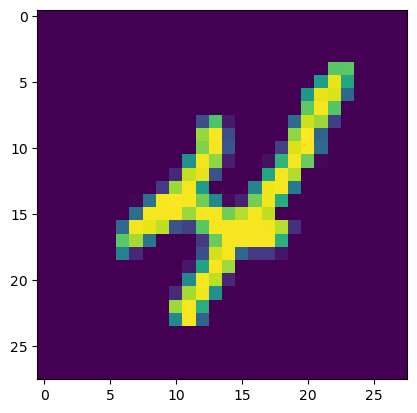

In [2]:
train_images, train_labels, test_images, test_labels = datasets.mnist()
plt.imshow(jnp.reshape(train_images[9], (28,28)))


In [230]:
net = Network(Sequential([
    Dense(784, 1024, jax.nn.tanh),
    Dense(1024, 10, jax.nn.tanh),
]))


In [408]:
train_size=60000
net.inference_learn(train_images[0:train_size], train_labels[0:train_size])
print(net.energy())

energy: [2.456e-01, 6.124e-02]
0.061243847


In [409]:
net.theta_update(lr=1e-6)


In [410]:
def accuracy(images, targets):
    target_class = jnp.argmax(targets, axis=1)
    predicted_class = jnp.argmax(net.predict(images), axis=1)
    return jnp.mean(predicted_class == target_class)

accuracy(train_images[0:train_size], train_labels[0:train_size])

Array(0.81085, dtype=float32)

In [411]:
test_size=10000
accuracy(test_images[0:test_size], test_labels[0:test_size])

Array(0.8272, dtype=float32)